<a href="https://colab.research.google.com/github/naotoo1/Stock-Price-Prediction-with-Keras/blob/main/Google_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras 
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizer_v1 import Adam
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

**Load data sets for training and testing**

In [2]:
data_train = pd.read_csv('Google_Stock_Price_Train.csv')
data_test = pd.read_csv('Google_Stock_Price_Test.csv')



**Feature Scaling**




In [3]:
scaler=MinMaxScaler()
train_ds = data_train.iloc[:,2:3].values
train_ds = scaler.fit_transform(train_ds)

**Choose n timestamps with one output needed for the training**

In [4]:
X_train = []
y_train = []
for i in range(60,len(train_ds)):
  X_train.append(train_ds[i-60:i,0])
  y_train.append(train_ds[i,0])
X_train,y_train= np.array(X_train), np.array(y_train)


**Reshape train set**

In [5]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))


**Initialise the RNN model**

In [6]:
model=Sequential()

**Add first LSTM layers with some Dropout regularization**

In [7]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

**Add second LSTM layer with Dropout regularization**

In [8]:
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

**Add third LSTM layer with Dropout regularization**

In [9]:
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

**Add fourth LSTM layer with Dropout regularization**

In [10]:
model.add(LSTM(units=50))
model.add(Dropout(0.2))

**Add output layer**

In [11]:
model.add(Dense(units=1))

**Compile the RNN model**

In [12]:

model.compile(optimizer='adam',loss='mean_squared_error')

**Fit the RNN model to the train set for m batch_size and n_epochs**

In [13]:

model.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
38/38 [==============================] - 26s 237ms/step - loss: 0.0459
Epoch 2/100
38/38 [==============================] - 7s 174ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0055
Epoch 11/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0041
Epoch 13/100

**Summary of RNN model**

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

**Plot training loss**

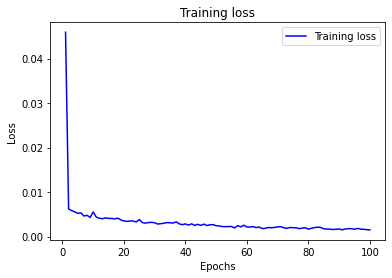

In [15]:

loss = model.history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Real Stock Price**





In [16]:
data_test=pd.read_csv('Google_Stock_Price_Test.csv')
stock_ds = data_test.iloc[:,2:3].values


**Total Stock_Price data**

In [17]:
dataset_total = pd.concat((data_train['High'],data_test['High']),axis=0)


**Inputs for predictions**

In [18]:
inputs=dataset_total[len(dataset_total)-len(data_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test=[]
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_stock_price = model.predict(X_test)
pred_stock_price = scaler.inverse_transform(pred_stock_price)

**Visualize results**

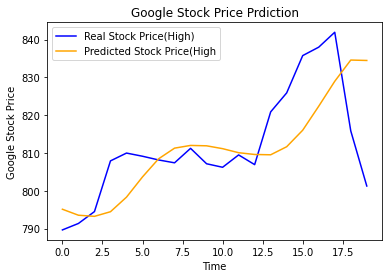

In [19]:
plt.plot(stock_ds,color='blue',label='Real Stock Price(High)')
plt.plot(pred_stock_price,color='orange',label='Predicted Stock Price(High')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.title('Google Stock Price Prdiction')
plt.legend()

**Saving Model**

In [20]:
model.save('GSP')


INFO:tensorflow:Assets written to: GSP/assets


INFO:tensorflow:Assets written to: GSP/assets


**Load Saved Model** 

In [21]:
from keras.models import load_model
model1=load_model('GSP')

**New period prediction**

In [22]:
inputs=dataset_total[len(dataset_total)-22-60:].values
inputs=inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test=[]
for i in range(60,82):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_stock_price = model.predict(X_test)
pred_stock_price = scaler.inverse_transform(pred_stock_price)

**Visualize results**

In [23]:
df = pd.DataFrame({'Date':['02/1/2017','02/2/2017']})
df_new = pd.concat([data_test,df],axis=0)
df_new['Pred_Stock_Price(High)'] = pred_stock_price
df_new.set_index('Date',inplace=True)
df_new.rename(columns={'High':'Real_Stock_Price(High)'},inplace=True)


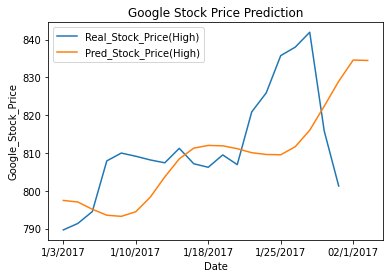

In [24]:
df_new[['Real_Stock_Price(High)','Pred_Stock_Price(High)']].plot()
plt.ylabel('Google_Stock_Price')
plt.title('Google Stock Price Prediction')
plt.legend()

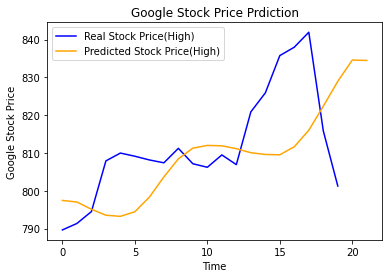

In [25]:
plt.plot(stock_ds,color='blue',label='Real Stock Price(High)')
plt.plot(pred_stock_price,color='orange',label='Predicted Stock Price(High)')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.title('Google Stock Price Prdiction')
plt.legend()